<a href="https://colab.research.google.com/github/The-Loved-One/AIML-NITT-Chatbot/blob/patch-1/ChatbotWord2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Preprocessing

In [ ]:
import json
import pandas as pd
import re
import string

with open('DataSet.json', 'r') as json_file:
    data = json.load(json_file)

df = pd.DataFrame(columns=['tag', 'pattern', 'response'])

data_to_concat = []

for item in data:
    tag = item['tag']
    for pattern, response in zip(item['patterns'], item['responses']):
        pattern_tokens = pattern.lower().split()
        response_tokens = response.lower().split()

        pattern_tokens = [re.sub(f"[{re.escape(string.punctuation)}]", '', token) for token in pattern_tokens]
        response_tokens = [re.sub(f"[{re.escape(string.punctuation)}]", '', token) for token in response_tokens]

        pattern_tokens = [token for token in pattern_tokens if token.strip()]
        response_tokens = [token for token in response_tokens if token.strip()]

        pattern_cleaned = ' '.join(pattern_tokens)
        response_cleaned = ' '.join(response_tokens)

        data_to_concat.append({'tag': tag, 'pattern': pattern_cleaned, 'response': response_cleaned})

df = pd.concat([df, pd.DataFrame(data_to_concat)], ignore_index=True)

# df

# 2. Data Exploration

Number of data samples: 253
Number of unique tags: 43
Unique tags: ['general_inquiries' 'faculty' 'accommodation' 'student_life' 'admissions'
 'career_services' 'campus_safety' 'library_services' 'health_services'
 'dormitory' 'extracurricular' 'international_students'
 'academic_advising' 'transportation' 'ragging' 'hod' 'salutation'
 'vacation' 'swear' 'inappropriate' 'library' 'transport' 'food' 'hostel'
 'placement' 'cafeteria' 'tuition' 'emergency' 'parking' 'clubs'
 'counseling' 'housing' 'registration' 'transcripts' 'ID_cards'
 'graduation' 'thanks' 'apology' 'greeting' 'farewell' 'positive_feedback'
 'negative_feedback' 'confused']

Pattern Statistics:
count                    253
unique                   227
top       how to join a club
freq                       3
Name: pattern, dtype: object

Response Statistics:
count                                                   253
unique                                                  233
top       study rooms can be reserved online

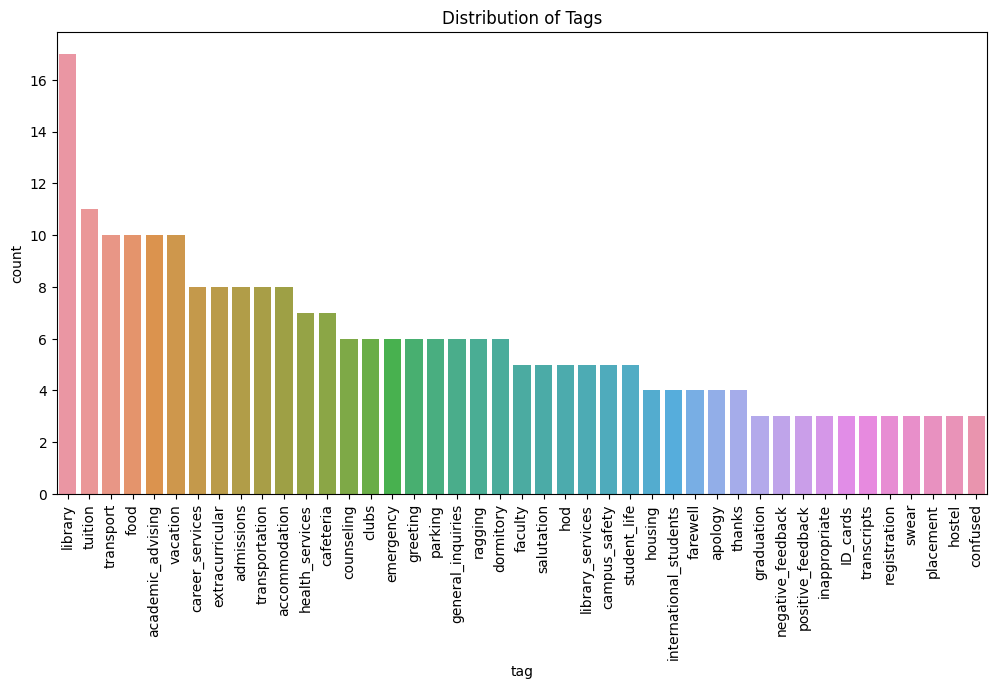

In [ ]:
print("Number of data samples:", len(df))
print("Number of unique tags:", df['tag'].nunique())
print("Unique tags:", df['tag'].unique())

print("\nPattern Statistics:")
print(df['pattern'].describe())

print("\nResponse Statistics:")
print(df['response'].describe())

print("\nSample Data:")
sample_data = df.sample(5)
print(sample_data)

tag_counts = df['tag'].value_counts()
print("\nTag Counts:")
print(tag_counts)

missing_data = df.isnull().sum()
print("\nMissing Data:")
print(missing_data)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tag', order=tag_counts.index)
plt.title("Distribution of Tags")
plt.xticks(rotation=90)
plt.show()

# 3. Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

pattern_matrix = vectorizer.fit_transform(df['pattern'])

response_matrix = vectorizer.fit_transform(df['response'])

pattern_array = pattern_matrix.toarray()

response_array = response_matrix.toarray()


# 4. Intent Classification

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

X = np.array(df['pattern'].values.tolist())
y = np.array(df['tag'].values.tolist())

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

clf = MultinomialNB()
clf.fit(X_vectorized, y)


MultinomialNB()

# 5. Chatbot

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

patterns = df['pattern'].tolist()
responses = df['response'].tolist()

patterns = [pattern.lower() for pattern in patterns]
responses = [response.lower() for response in responses]

X = np.array(patterns + responses)
y = np.array(df['tag'].tolist() * 2)  # Duplicate tags to match the extended patterns

vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

while True:
    user_input = input("User: ")
    if user_input.lower() == 'quit':
        break
    user_input_vectorized = vectorizer.transform([user_input.lower()])  # Lowercase user input
    predicted_label = clf.predict(user_input_vectorized)
    print("Chatbot:", predicted_label[0])


Accuracy: 0.38235294117647056
User: hi
Chatbot: greeting
User: where can i study in peace?
Chatbot: library
User: Where can i see the admission details?
Chatbot: admissions
User: give me the list of faculty for CSE Department
Chatbot: hod
User: where can i eat good food
Chatbot: food
User: recommend me good places to buy stationery stuff from
Chatbot: library
User: how are you doing
Chatbot: library
User: thanks
Chatbot: library
User: thanks :D
Chatbot: library
User: cls
Chatbot: library
User: clear
Chatbot: library
User: quit
